### End to end Data Analysis

#### 1. Load and explore the data

In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv('students_scores.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         100 non-null    object 
 1   math_score     100 non-null    float64
 2   reading_score  100 non-null    float64
 3   writing_score  100 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.3+ KB
None


,gender,math_score,reading_score,writing_score
0,male,70.9,72.6,87.5
1,female,70.8,63.2,87.2
2,male,77.9,72.9,86.5
3,male,73.3,77.3,85.0
4,female,55.5,79.6,84.7


In [36]:
# missing values
df.isnull().sum()

gender           0
math_score       0
reading_score    0
writing_score    0
dtype: int64

#### 2. Descriptive Analysis

Q1: What is the average math, reading, and writing score?

Q2: What is the highest and lowest score in each subject?

Q3: How do male and female students' scores compare?

In [37]:
# General overview
df.describe()

,math_score,reading_score,writing_score
count,100.000000,100.000000,100.000000
mean,69.637000,72.485000,70.507000
std,9.325274,8.462351,8.120074
min,47.700000,42.800000,53.000000
25%,64.025000,66.675000,64.225000
50%,70.400000,72.400000,70.450000
75%,74.875000,78.250000,75.700000
max,98.000000,91.200000,87.500000


In [38]:
# Group by gender
df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
gender,,,
female,68.885714,72.162500,70.626786
male,70.593182,72.895455,70.354545


In [39]:
gender_avg = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()
gender_avg

,math_score,reading_score,writing_score
gender,,,
female,68.885714,72.162500,70.626786
male,70.593182,72.895455,70.354545


#### 3. Feature Engineering

In [40]:
df['average_score'] = df[['math_score','reading_score','writing_score']].mean(axis=1)
df.head()

,gender,math_score,reading_score,writing_score,average_score
0,male,70.9,72.6,87.5,77.000000
1,female,70.8,63.2,87.2,73.733333
2,male,77.9,72.9,86.5,79.100000
3,male,73.3,77.3,85.0,78.533333
4,female,55.5,79.6,84.7,73.266667


### 4. Visual Analysis

Questions:

1. How are scores distributed?

2. Are there any outliers?

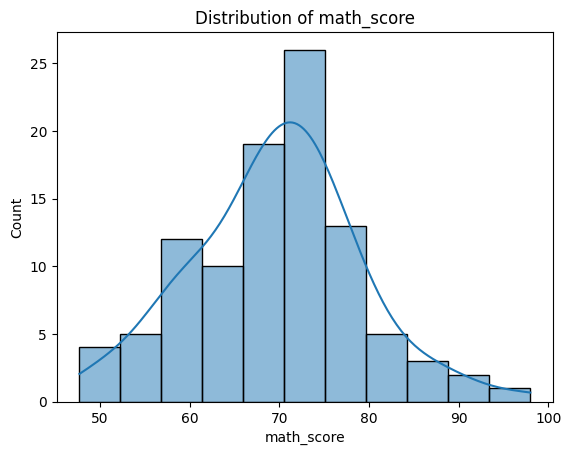

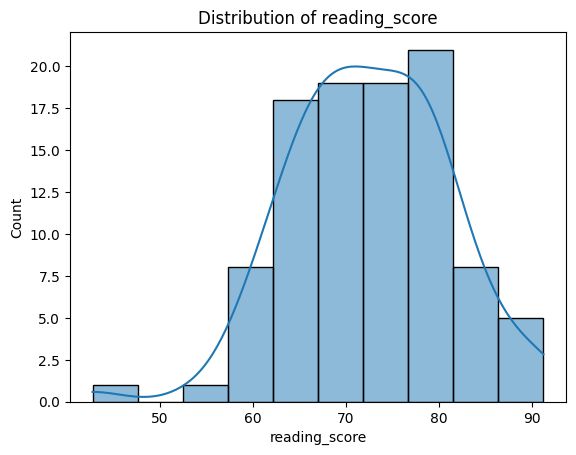

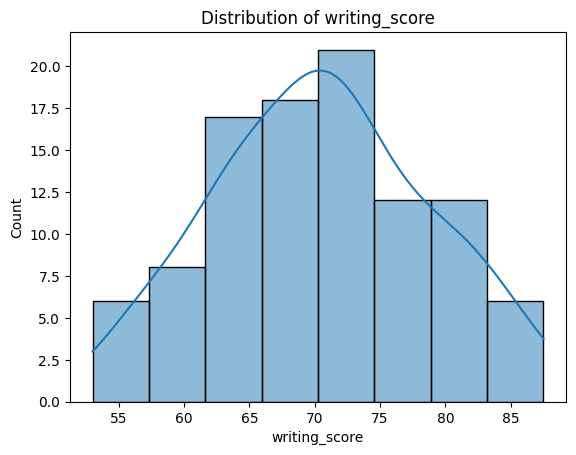

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each subject
for col in ['math_score', 'reading_score', 'writing_score']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

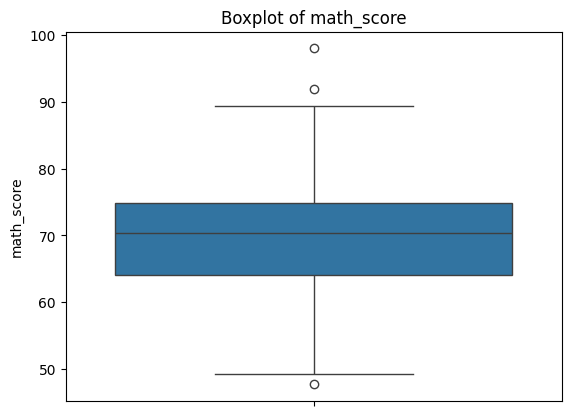

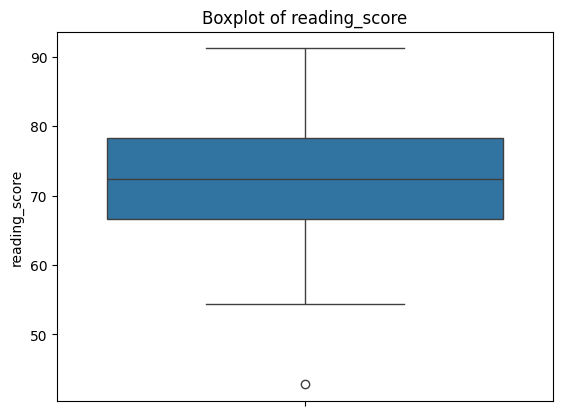

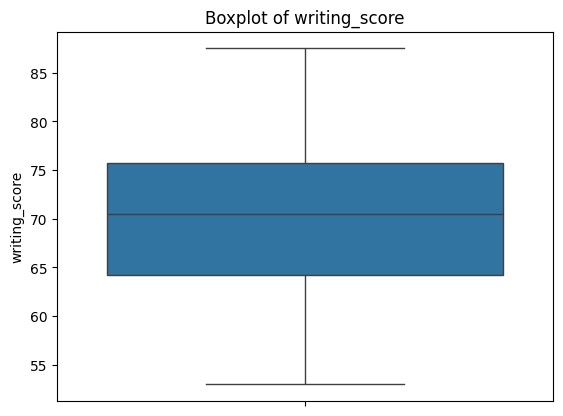

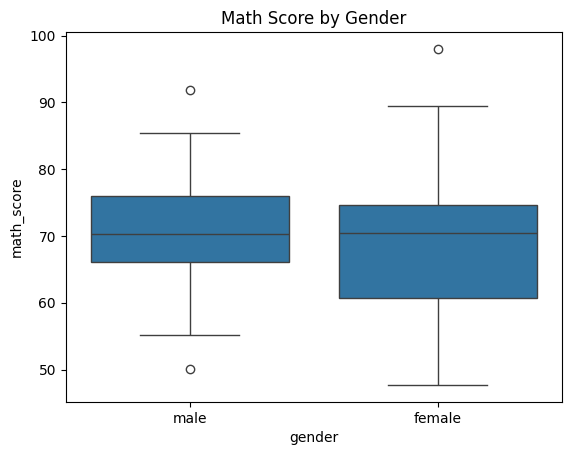

In [42]:
# Boxplots to detect outliers
for col in ['math_score', 'reading_score', 'writing_score']:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Boxplot comparing genders
sns.boxplot(x='gender', y='math_score', data=df)
plt.title('Math Score by Gender')
plt.show()

### 5. Outlier Analysis (from Boxplots)

Question: Which students have unusually low or high scores?

In [43]:
# Find outliers in math scores
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1

print(Q1); print(Q3); print(IQR) 

64.025
74.875
10.849999999999994


In [44]:
outliers = df[(df['math_score'] < (Q1 - 1.5 * IQR)) | (df['math_score'] > (Q3 + 1.5 * IQR))]
outliers

,gender,math_score,reading_score,writing_score,average_score
6,female,47.7,64.6,83.0,65.100000
12,male,91.9,61.1,80.9,77.966667
31,female,98.0,70.2,74.1,80.766667


In [45]:
# Find outliers in overall average scores
Q1 = df['average_score'].quantile(0.25)
Q3 = df['average_score'].quantile(0.75)
IQR = Q3 - Q1

print(Q1); print(Q3); print(IQR) 

67.96666666666665
73.73333333333333
5.76666666666668


In [46]:
outliers = df[(df['average_score'] < (Q1 - 1.5 * IQR)) | (df['average_score'] > (Q3 + 1.5 * IQR))]
outliers

,gender,math_score,reading_score,writing_score,average_score
9,female,89.4,80.8,82.0,84.066667
94,male,55.8,64.5,57.2,59.166667


### 6. Inferential Statistics: Hypothesis Testing

#### Test 1: Are the average math scores different for males and females? (Two-sample t-test)

In [47]:
from scipy.stats import ttest_ind

male_math = df[df['gender'] == 'male']['math_score']
female_math = df[df['gender'] == 'female']['math_score']

t_stat, p_val = ttest_ind(male_math, female_math)
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Significant difference in math scores between genders.")
else:
    print("Conclusion: No significant difference in math scores between genders.")

T-statistic = 0.91, p-value = 0.3661
Conclusion: No significant difference in math scores between genders.


#### Test 2: Is the average reading score different from 70? (One-sample t-test)

In [48]:
from scipy.stats import ttest_1samp

t_stat, p_val = ttest_1samp(df['reading_score'], 70)
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Reading scores are significantly different from 70.")
else:
    print("Conclusion: No significant difference from 70.")

T-statistic = 2.94, p-value = 0.0041
Conclusion: Reading scores are significantly different from 70.


### Bonus: Normal Distribution Test

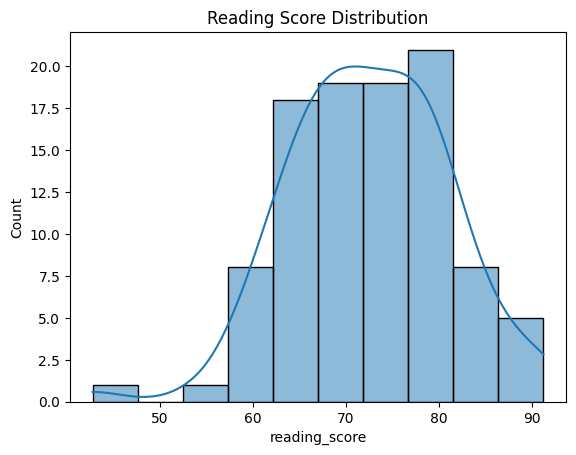

In [49]:
sns.histplot(df['reading_score'], kde=True)
plt.title("Reading Score Distribution")
plt.show()

In [50]:
from scipy.stats import shapiro

# Shapiro-Wilk test on reading_score
stat, p = shapiro(df['reading_score'])

print(f"Shapiro-Wilk Test Statistic = {stat:.4f}")
print(f"p-value = {p:.4f}")

# Interpretation
if p > 0.05:
    print("✔️ The reading_score data is likely normally distributed (Fail to reject H₀).")
else:
    print("❌ The reading_score data is not normally distributed (Reject H₀).")

Shapiro-Wilk Test Statistic = 0.9865
p-value = 0.4056
✔️ The reading_score data is likely normally distributed (Fail to reject H₀).


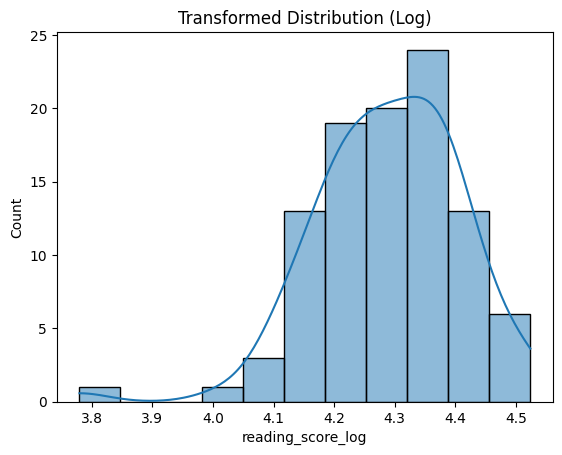

In [51]:
# Log transformation
data = df['reading_score']

# Log transformation (only for positive values)
df['reading_score_log'] = np.log(data + 1)

sns.histplot(df['reading_score_log'], kde=True)
plt.title("Transformed Distribution (Log)")
plt.show()

In [52]:
# Shapiro-Wilk test on reading_score
stat, p = shapiro(df['reading_score_log'])

print(f"Shapiro-Wilk Test Statistic = {stat:.4f}")
print(f"p-value = {p:.4f}")

# Interpretation
if p > 0.05:
    print("✔️ The reading_score_log data is likely normally distributed (Fail to reject H₀).")
else:
    print("❌ The reading_score_log data is not normally distributed (Reject H₀).")

Shapiro-Wilk Test Statistic = 0.9631
p-value = 0.0067
❌ The reading_score_log data is not normally distributed (Reject H₀).


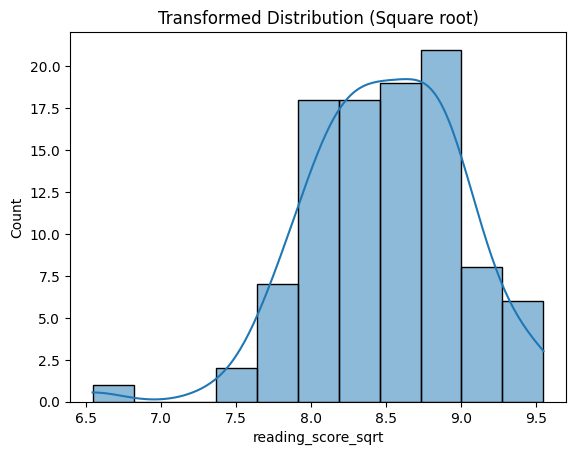

In [53]:
# Squareroot transformation (only for positive values)
df['reading_score_sqrt'] = np.sqrt(data)

sns.histplot(df['reading_score_sqrt'], kde=True)
plt.title("Transformed Distribution (Square root)")
plt.show()

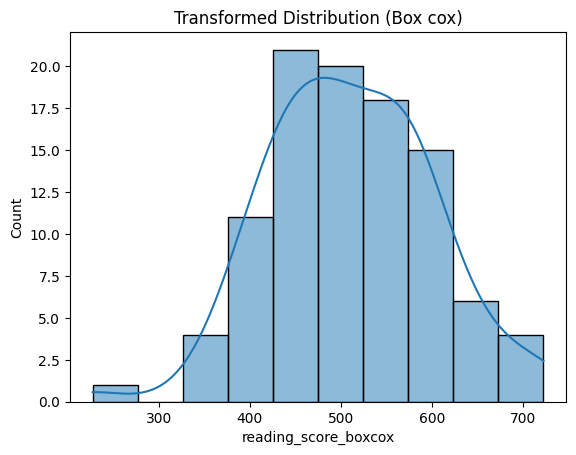

In [54]:
# Box-Cox transformation (only positive values)
from scipy import stats
df['reading_score_boxcox'], _ = stats.boxcox(data + 1)

sns.histplot(df['reading_score_boxcox'], kde=True)
plt.title("Transformed Distribution (Box cox)")
plt.show()

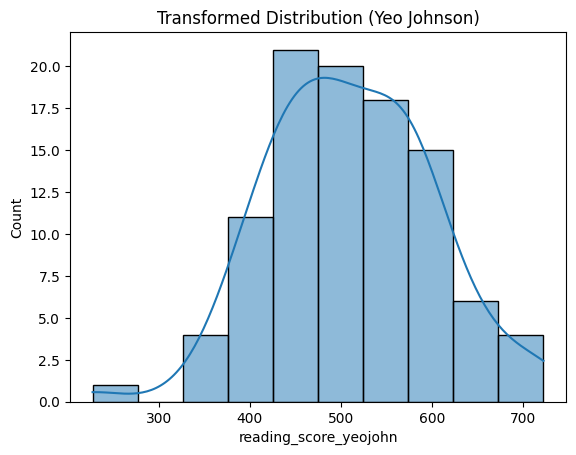

In [55]:
# Yeo-Johnson transformation (positive or negative values)
from scipy import stats
df['reading_score_yeojohn'], _ = stats.yeojohnson(data)

sns.histplot(df['reading_score_yeojohn'], kde=True)
plt.title("Transformed Distribution (Yeo Johnson)")
plt.show()

In [56]:
# Shapiro-Wilk test on reading_score
stat, p = shapiro(df['reading_score_yeojohn'])

print(f"Shapiro-Wilk Test Statistic = {stat:.4f}")
print(f"p-value = {p:.4f}")

# Interpretation
if p > 0.05:
    print("✔️ The reading_score yeo john data is likely normally distributed (Fail to reject H₀).")
else:
    print("❌ The reading_score yep john data is not normally distributed (Reject H₀).")


Shapiro-Wilk Test Statistic = 0.9897
p-value = 0.6406
✔️ The reading_score yeo john data is likely normally distributed (Fail to reject H₀).
